In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
# import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
breast_data = pd.read_csv('data.csv')
breast_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
breast_data.shape

(569, 33)

In [4]:
breast_data['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

In [5]:
breast_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
breast_data.drop(columns=['Unnamed: 32'], inplace=True)

In [7]:
breast_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

features description 
- id: Unique identifier for each patient/sample
- diagnosis:Label for classification: 'M' = malignant (cancerous) or 'B' = benign (non-cancerous)
- radius_mean:Average distance from the center of the tumor to the edge (essentially, size of the tumor).
- texture_mean:Standard deviation of gray-scale pixel values — relates to smoothness or roughness of the tumor surface.
- perimeter_mean:Average perimeter (length around the boundary) of the tumor.
- area_mean:Average area enclosed within the tumor boundary.
- smoothness_mean:Average measure of how smooth the edges of the tumor are (lower = smoother).
- compactness_mean:(Perimeter² / Area - 1.0): describes how compact (not irregular) the tumor shape is.
- concavity_mean:Average severity of concave parts of the tumor contour (dips inward).
- concave points_mean:Average number of concave sections on the tumor boundary.
- symmetry_mean:Average measure of how symmetric the tumor is.
- fractal_dimension_mean:Measure of tumor boundary complexity (higher means a more complex, jagged shape).
- radius_se:Standard error of the radius.
- texture_se:Standard error of the texture.
- perimeter_se:Standard error of the perimeter.
- area_se:Standard error of the area.
- smoothness_se:Standard error of smoothness.
- compactness_se:Standard error of compactness.
- concavity_se:Standard error of concavity.
- concave points_se:Standard error of concave points.
- symmetry_se:Standard error of symmetry.
- fractal_dimension_se:Standard error of fractal dimension

In [8]:
#check for null values
breast_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
breast_data=breast_data.drop('id', axis=1)

C:\Users\nesri\AppData\Local\Temp\ipykernel_36740\257394300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=breast_data, palette='Set2')


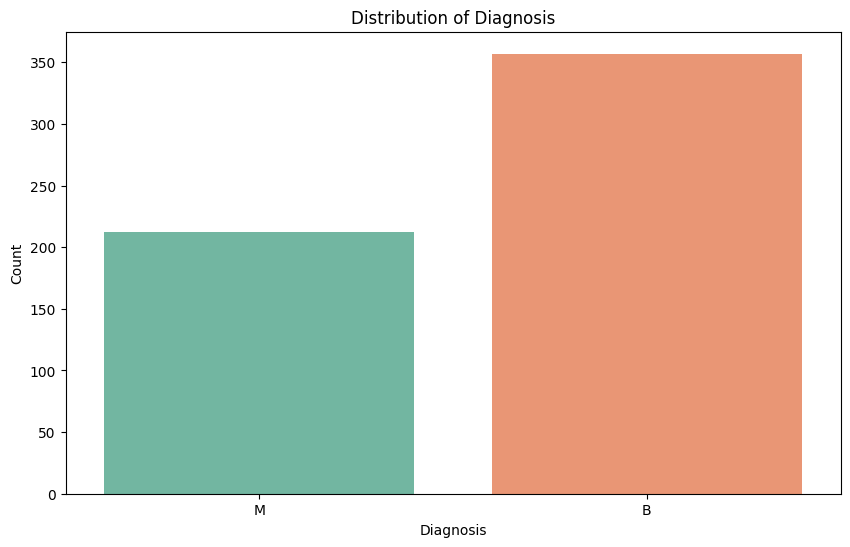

In [65]:
#plot distribution of columns
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=breast_data, palette='Set2')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()



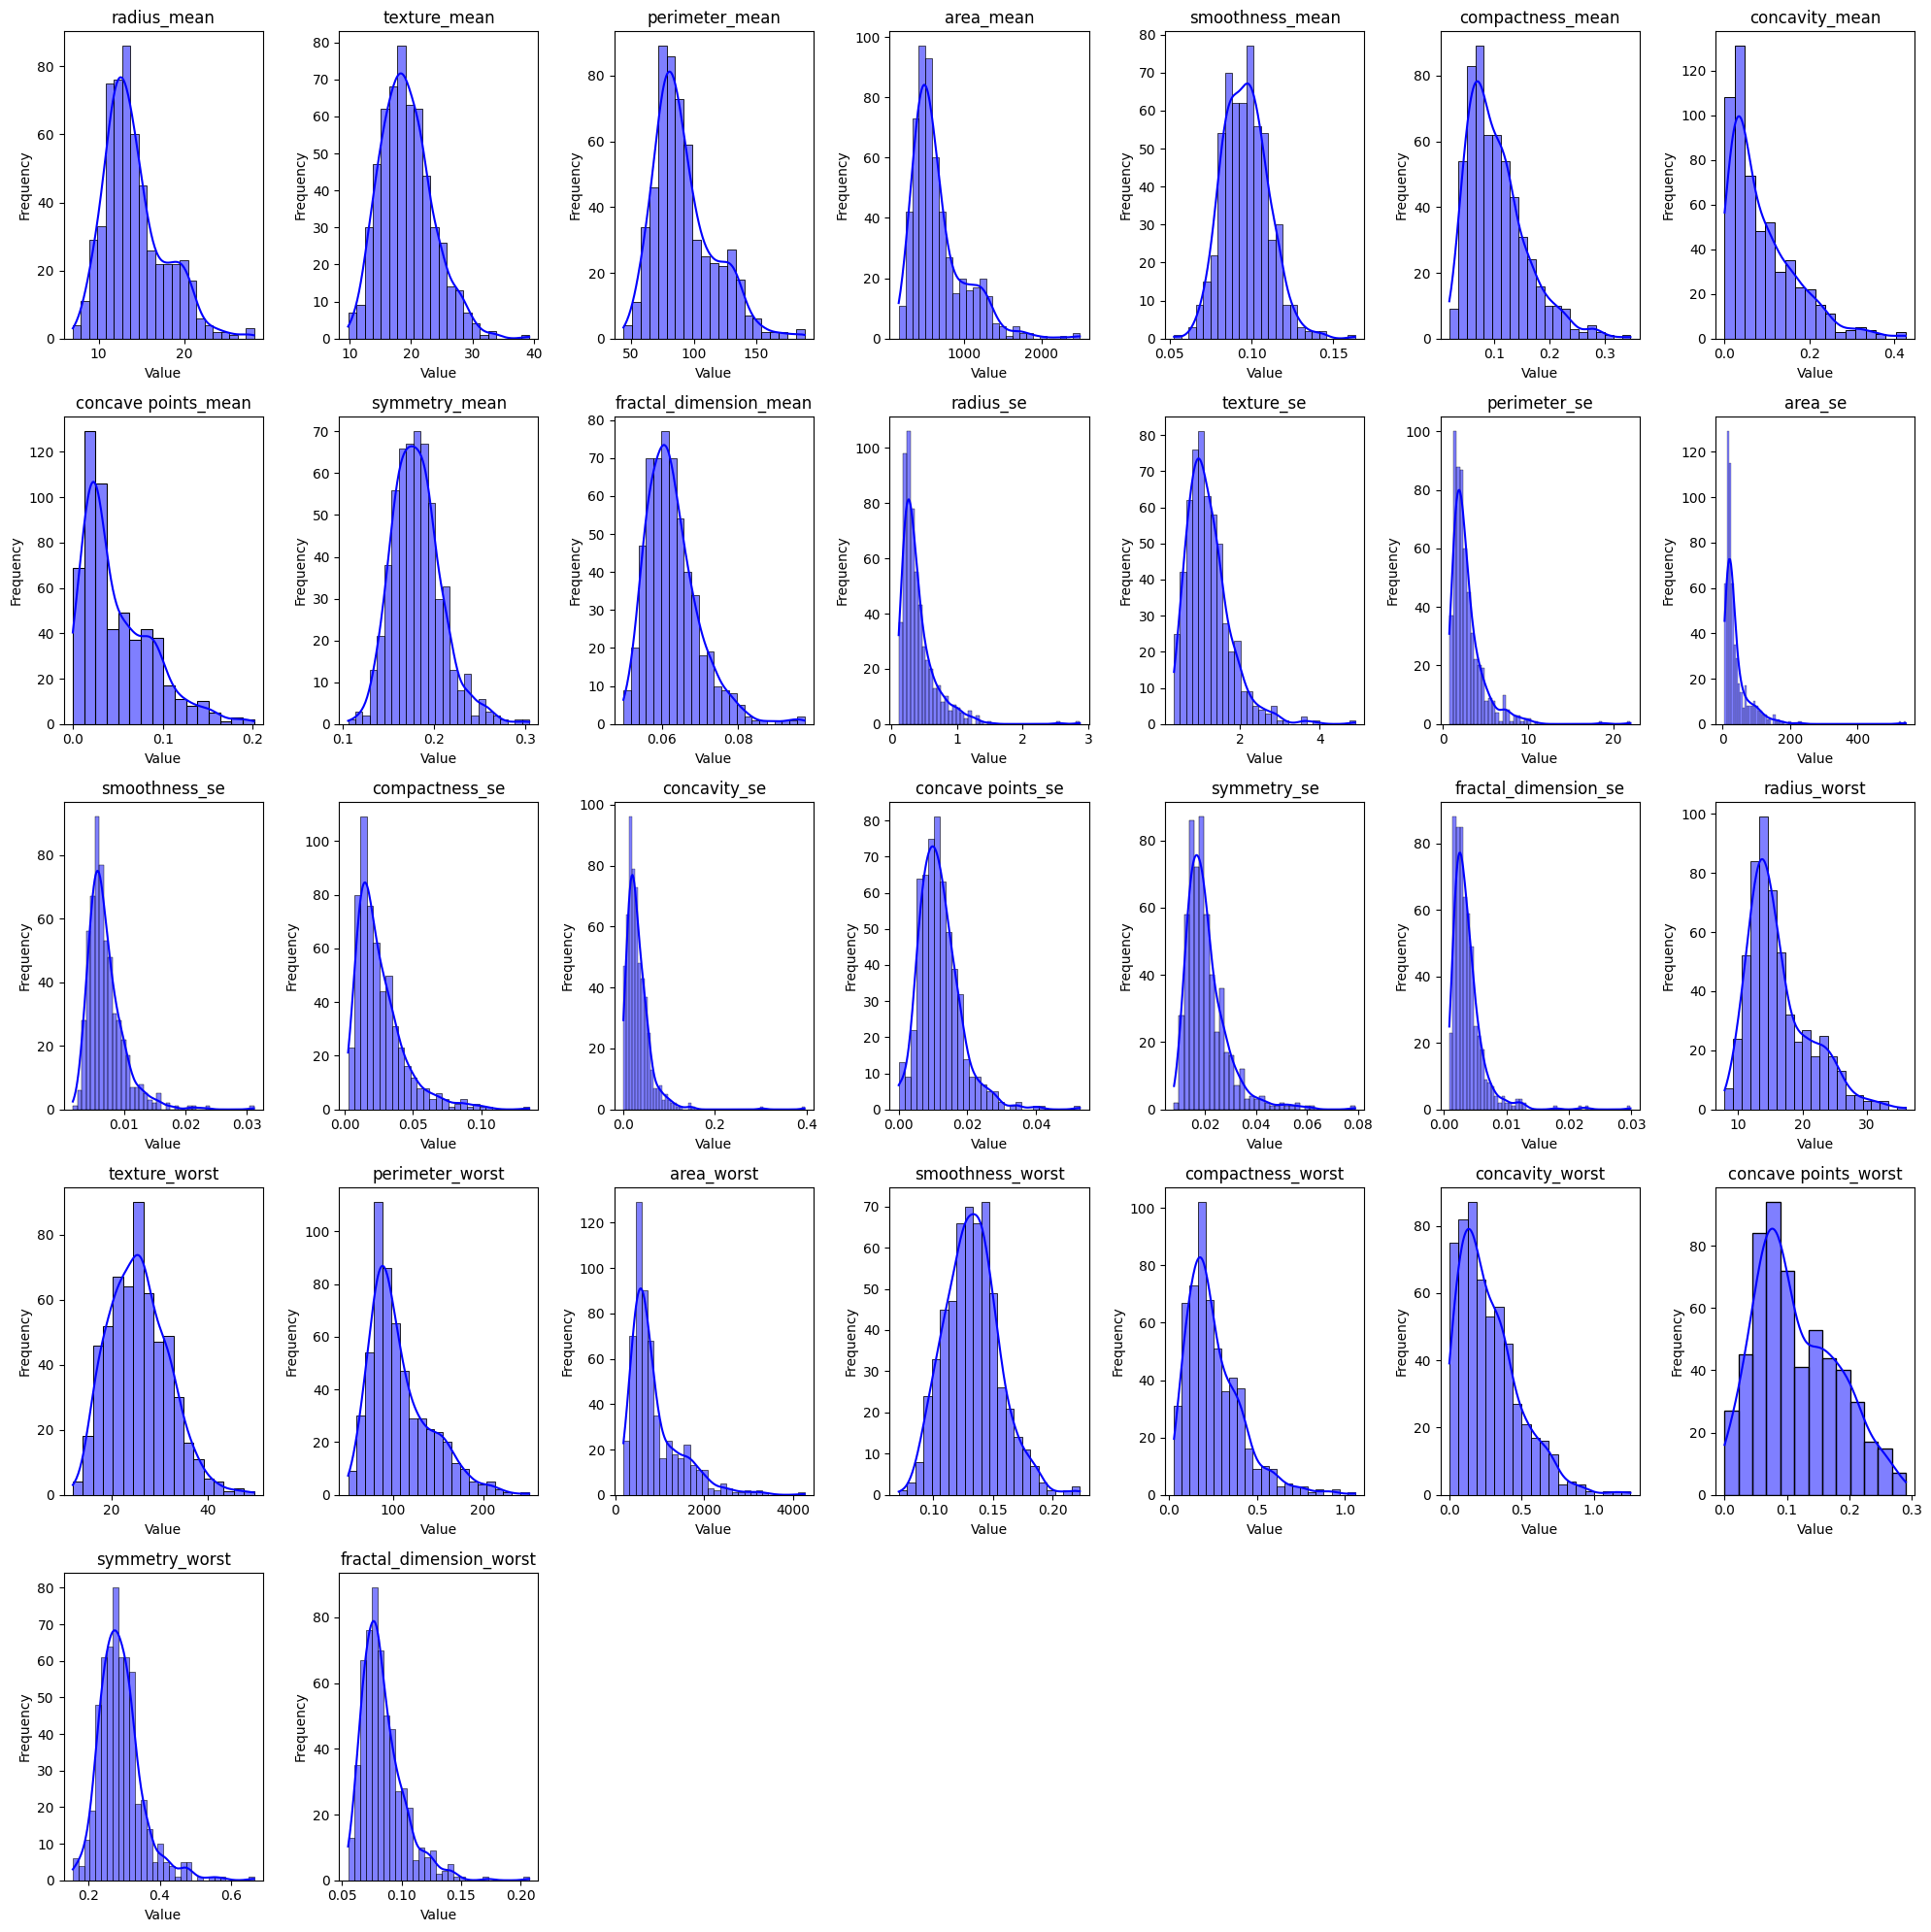

In [35]:
#plot all columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(breast_data.columns[1:], 1):
    plt.subplot(5, 7, i)
    sns.histplot(breast_data[col], kde=True, color='blue')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()

In [10]:
breast_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
breast_data['diagnosis'] = breast_data['diagnosis'].map({'M': 1, 'B': 0})

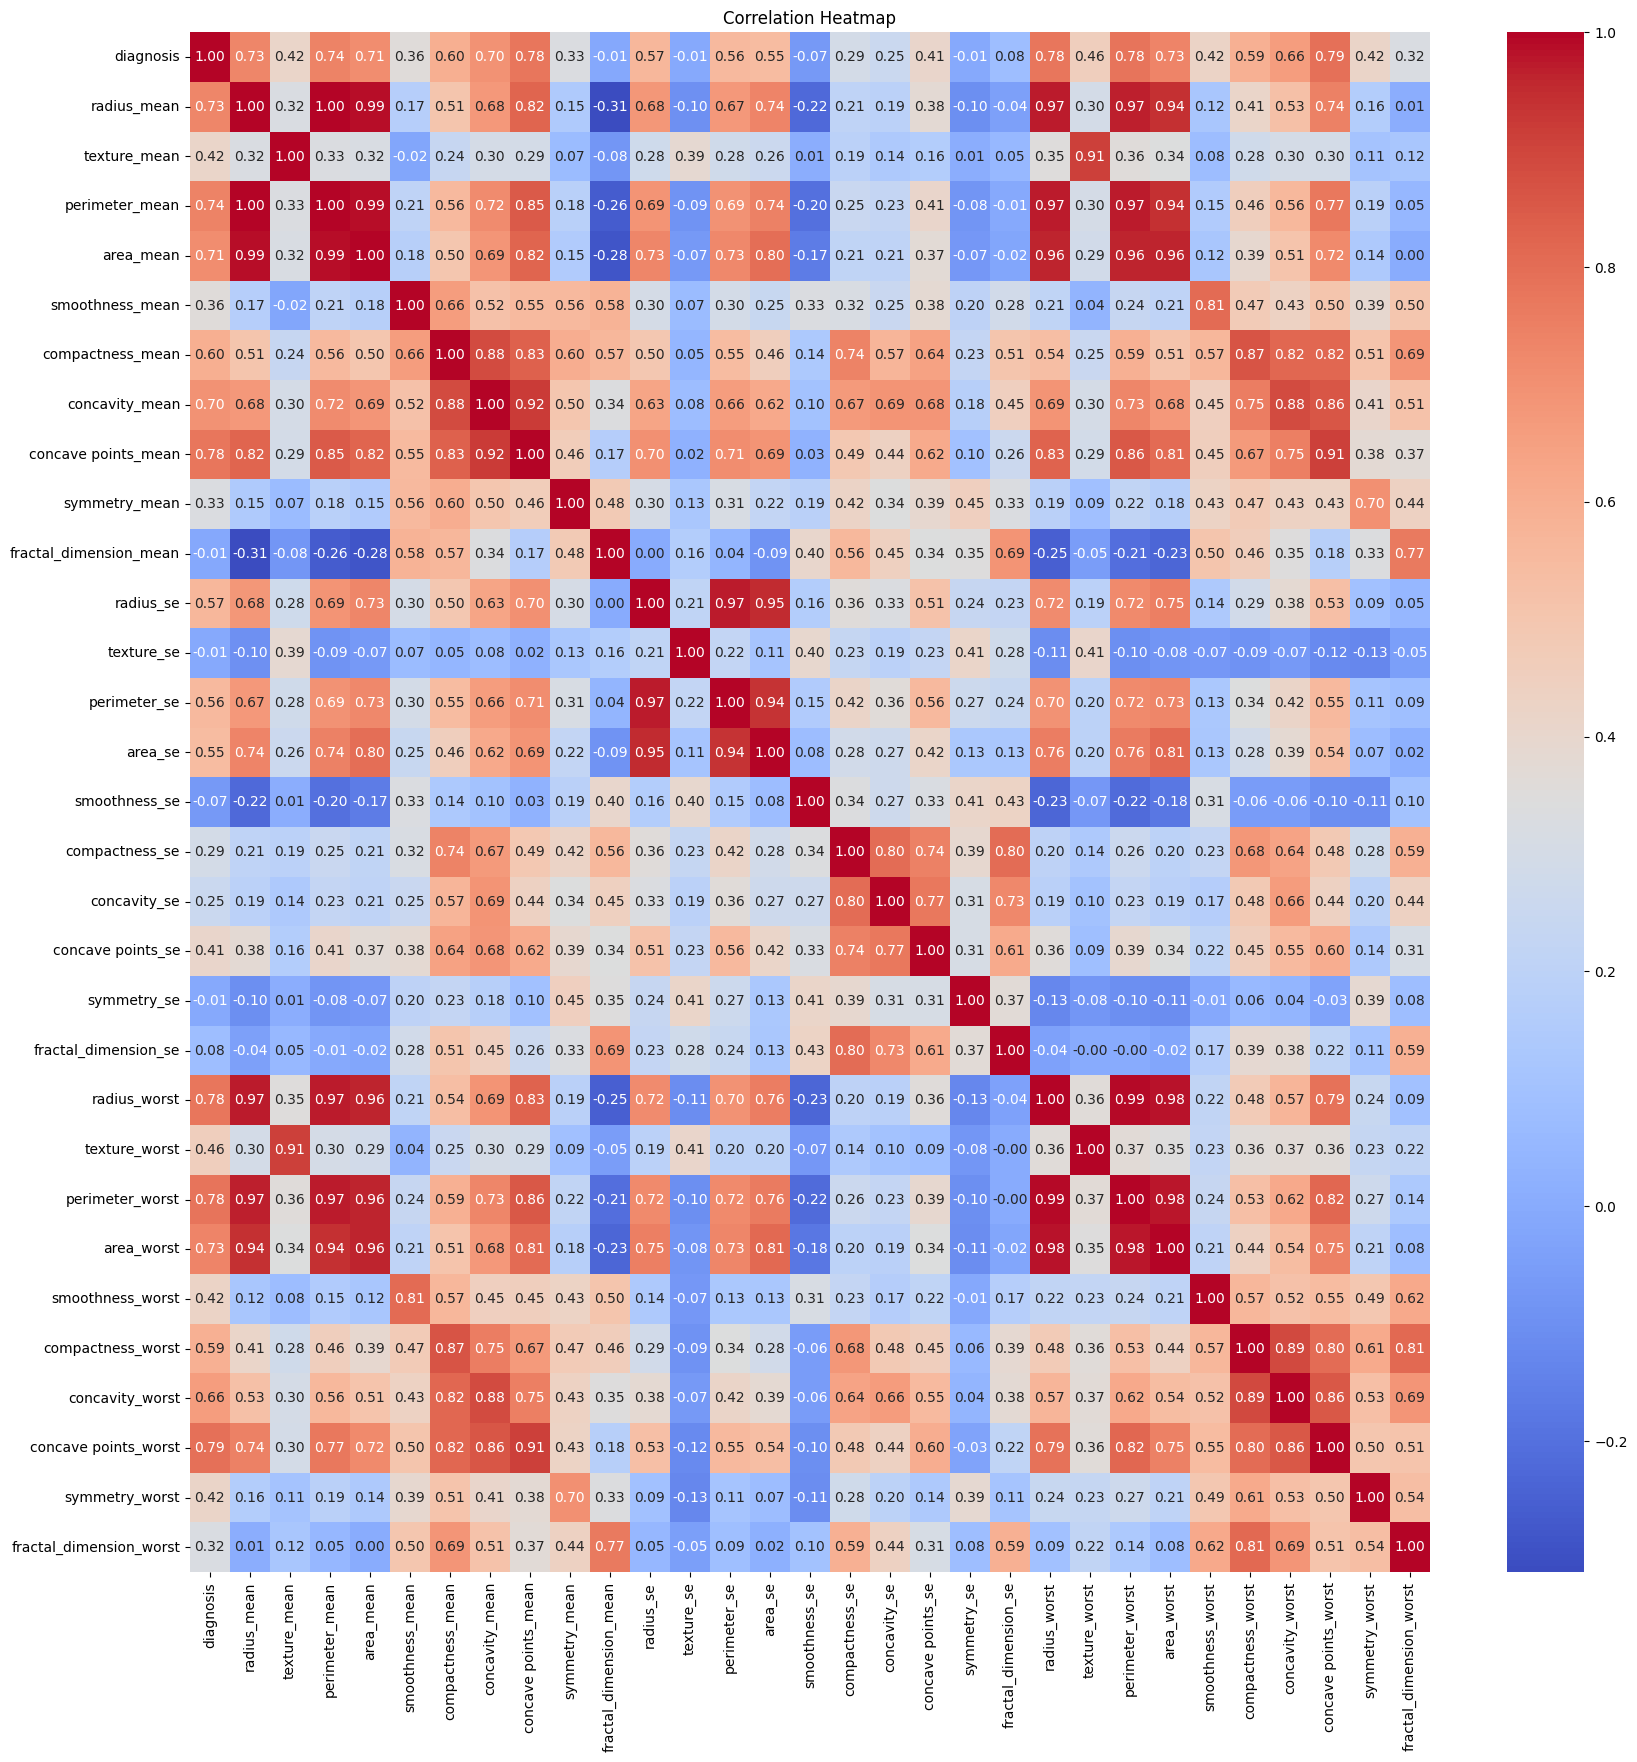

In [38]:
#heat map 
plt.figure(figsize=(20, 20))
sns.heatmap(breast_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [12]:
X_data=breast_data.drop('diagnosis', axis=1)
y_data=breast_data['diagnosis']

In [1]:
# features = X_data.columns

# for feature in features:
#     plt.figure(figsize=(10,6))
#     sns.swarmplot(data=breast_data, x='diagnosis', y=feature, palette='Set2')
#     plt.title(f'Swarm Plot of {feature} by Diagnosis')
#     plt.show()


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [14]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


do feature importance 

In [72]:
#random forest feature importance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]


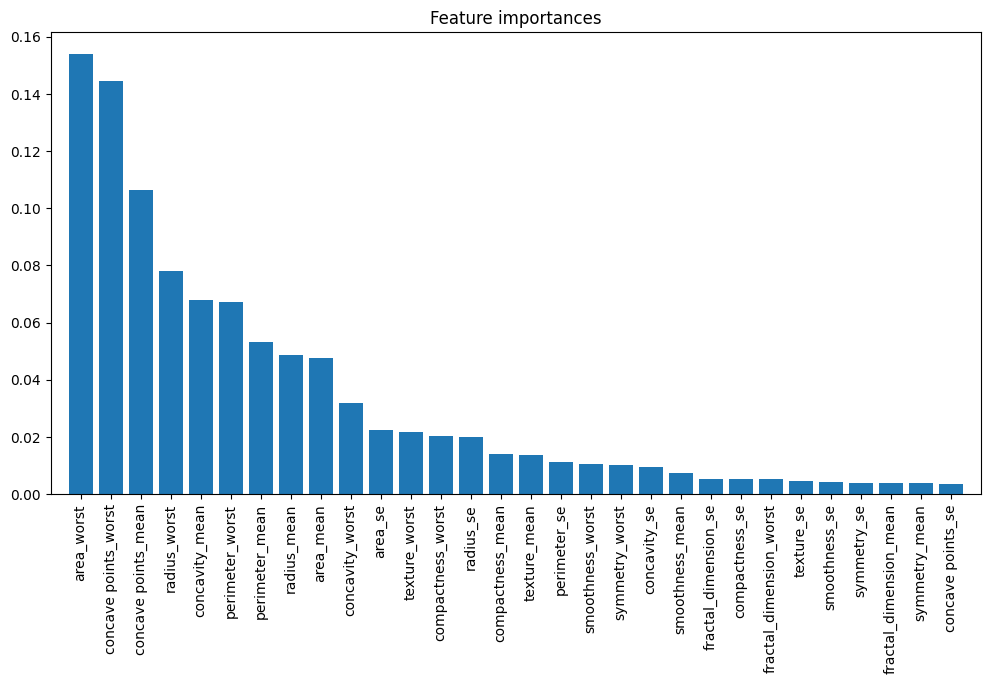

In [74]:
# Plot the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")

plt.xticks(range(X_train.shape[1]), X_data.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [75]:
#top 20 features
top_20_features = [X_data.columns[indices[i]] for i in range(20)]
print("Top 20 features:", top_20_features)

Top 20 features: ['area_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'concavity_mean', 'perimeter_worst', 'perimeter_mean', 'radius_mean', 'area_mean', 'concavity_worst', 'area_se', 'texture_worst', 'compactness_worst', 'radius_se', 'compactness_mean', 'texture_mean', 'perimeter_se', 'smoothness_worst', 'symmetry_worst', 'concavity_se']


In [76]:
X_data=X_data[top_20_features]

In [77]:
X_data

,area_worst,concave points_worst,concave points_mean,radius_worst,concavity_mean,perimeter_worst,perimeter_mean,radius_mean,area_mean,concavity_worst,area_se,texture_worst,compactness_worst,radius_se,compactness_mean,texture_mean,perimeter_se,smoothness_worst,symmetry_worst,concavity_se
0,2019.0,0.2654,0.14710,25.380,0.30010,184.60,122.80,17.99,1001.0,0.7119,153.40,17.33,0.66560,1.0950,0.27760,10.38,8.589,0.16220,0.4601,0.05373
1,1956.0,0.1860,0.07017,24.990,0.08690,158.80,132.90,20.57,1326.0,0.2416,74.08,23.41,0.18660,0.5435,0.07864,17.77,3.398,0.12380,0.2750,0.01860
2,1709.0,0.2430,0.12790,23.570,0.19740,152.50,130.00,19.69,1203.0,0.4504,94.03,25.53,0.42450,0.7456,0.15990,21.25,4.585,0.14440,0.3613,0.03832
3,567.7,0.2575,0.10520,14.910,0.24140,98.87,77.58,11.42,386.1,0.6869,27.23,26.50,0.86630,0.4956,0.28390,20.38,3.445,0.20980,0.6638,0.05661
4,1575.0,0.1625,0.10430,22.540,0.19800,152.20,135.10,20.29,1297.0,0.4000,94.44,16.67,0.20500,0.7572,0.13280,14.34,5.438,0.13740,0.2364,0.05688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2027.0,0.2216,0.13890,25.450,0.24390,166.10,142.00,21.56,1479.0,0.4107,158.70,26.40,0.21130,1.1760,0.11590,22.39,7.673,0.14100,0.2060,0.05198
565,1731.0,0.1628,0.09791,23.690,0.14400,155.00,131.20,20.13,1261.0,0.3215,99.04,38.25,0.19220,0.7655,0.10340,28.25,5.203,0.11660,0.2572,0.03950
566,1124.0,0.1418,0.05302,18.980,0.09251,126.70,108.30,16.60,858.1,0.3403,48.55,34.12,0.30940,0.4564,0.10230,28.08,3.425,0.11390,0.2218,0.04730
567,1821.0,0.2650,0.15200,25.740,0.35140,184.60,140.10,20.60,1265.0,0.9387,86.22,39.42,0.86810,0.7260,0.27700,29.33,5.772,0.16500,0.4087,0.07117


In [83]:
#eliminate by correlation 
correlations = breast_data[['diagnosis'] + top_20_features].corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)
print(correlations)

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
texture_worst           0.456903
smoothness_worst        0.421465
symmetry_worst          0.416294
texture_mean            0.415185
concavity_se            0.253730
Name: diagnosis, dtype: float64


In [84]:
# Filter features with correlation >= 0.7
high_corr_features = correlations[correlations >= 0.7].index.tolist()

# Update X_data to keep only the high correlation features
X_data = X_data[high_corr_features]

In [85]:
X_data

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0
...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [87]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)

## VQC

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.metrics import accuracy_score

num_qubits = X_train_scaled.shape[1]

# Define the quantum device
dev = qml.device("default.qubit", wires=num_qubits)

# Define the quantum circuit
#note to replace this by AngleEmbedding (from pennylane.templates import AngleEmbedding)
def circuit(params, x):
    # Angle encoding
    for i in range(num_qubits):
        qml.RY(x[i], wires=i)
    
    # Variational layer
    for i in range(num_qubits):
        qml.RY(params[i], wires=i)
        qml.RZ(params[i + num_qubits], wires=i)
    
    # Entangling layer
    for i in range(num_qubits - 1):
        qml.CNOT(wires=[i, i + 1])
    if num_qubits > 2:
        qml.CNOT(wires=[num_qubits-1, 0])  # Close the chain (optional)

# Define the QNode
@qml.qnode(dev)
def quantum_model(params, x):
    circuit(params, x)
    return qml.expval(qml.PauliZ(0))  # Readout only the first qubit

# Define the variational quantum classifier (binary: 0 or 1)
def VQC(params, X):
    predictions = []
    for x in X:
        q_out = quantum_model(params, x)
        # Convert output: PauliZ expectation in [-1,1] → class 0 or 1
        predictions.append(1 if q_out > 0 else 0)
    return np.array(predictions)

# Initialize parameters
np.random.seed(42)
params = np.random.uniform(-np.pi, np.pi, size=(2 * num_qubits,))

# Define the cost function (binary cross-entropy is better, but simple MSE for now)
def cost(params, X, y):
    predictions = VQC(params, X)
    return np.mean((predictions - y) ** 2)

# Optimize the parameters
opt = qml.GradientDescentOptimizer(stepsize=0.1)
steps = 100

for step in range(steps):
    params = opt.step(lambda p: cost(p, X_train_scaled, y_train), params)
    if step % 10 == 0:
        train_acc = accuracy_score(y_train, VQC(params, X_train_scaled))
        print(f"Step {step}: Train Accuracy = {train_acc:.3f}")


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 0: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 10: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 20: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 30: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 40: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 50: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 60: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 70: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 80: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


Step 90: Train Accuracy = 0.684


c:\Users\nesri\Documents\ness\nuyad hackathon\work\Nyuad_env\lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


In [ ]:
#consider to plot the circuit for the classifier 

In [93]:
# Make predictions on the test set
y_pred = VQC(params, X_test_scaled)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Final Test Accuracy: 0.5789


First result with the VQC : 
- Train : 0.68

- test : 0.57

## Quantum SVM : 

In [108]:
#same encoding : using angle embedding
from pennylane.templates import AngleEmbedding
num_qubits = X_train_scaled.shape[1]

# Define the quantum device
dev = qml.device("default.qubit", wires=num_qubits)

# Define the quantum circuit
@qml.qnode(dev)
def feature_map(x):
    # Embed the data into the circuit
    qml.AngleEmbedding(x, wires=range(num_qubits), rotation='Y')
    # Return the full probability vector
    return qml.probs(wires=range(num_qubits))

In [109]:
#prepare the kernel 
from pennylane.kernels import kernel_matrix

# def quantum_kernel(X1, X2):
#     return kernel_matrix(X1, X2, kernel=lambda x, y: np.abs(np.dot(feature_map(x), feature_map(y))))

In [111]:
def quantum_kernel(X1, X2):
    # kernel_matrix will call our feature_map QNode under the hood
    return kernel_matrix(
        X1, X2,
        kernel=lambda x, y: np.dot(feature_map(x), feature_map(y))
    )

In [112]:
X_train_pl = np.array(X_train_scaled)
X_test_pl  = np.array(X_test_scaled)

# 5. Compute the kernel matrices
K_train = quantum_kernel(X_train_pl, X_train_pl)
K_test  = quantum_kernel(X_test_pl,  X_train_pl)

In [113]:
#train the svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svm = SVC(kernel='precomputed')
svm.fit(K_train, y_train)

# Evaluate the SVM
train_accuracy = svm.score(K_train, y_train)
test_accuracy = svm.score(K_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.7473
Test Accuracy: 0.7281


- Train Accuracy: 0.7473
- Test Accuracy: 0.7281

In [115]:
#save the model 
import joblib
joblib.dump(svm, 'Qsvm_model.pkl')

['Qsvm_model.pkl']

## Change the feature selection 

keep only : ['radius error', 'worst radius', 'worst area', 'worst concave points']

In [14]:
X_data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
Top4_features = ['radius_se', 'radius_worst', 'area_worst', 'concave points_worst']
X_data_new=X_data[Top4_features]

In [16]:
X_data_new.shape

(569, 4)

In [17]:
X_data_new

,radius_se,radius_worst,area_worst,concave points_worst
0,1.0950,25.380,2019.0,0.2654
1,0.5435,24.990,1956.0,0.1860
2,0.7456,23.570,1709.0,0.2430
3,0.4956,14.910,567.7,0.2575
4,0.7572,22.540,1575.0,0.1625
...,...,...,...,...
564,1.1760,25.450,2027.0,0.2216
565,0.7655,23.690,1731.0,0.1628
566,0.4564,18.980,1124.0,0.1418
567,0.7260,25.740,1821.0,0.2650


In [18]:
y_data.shape

(569,)

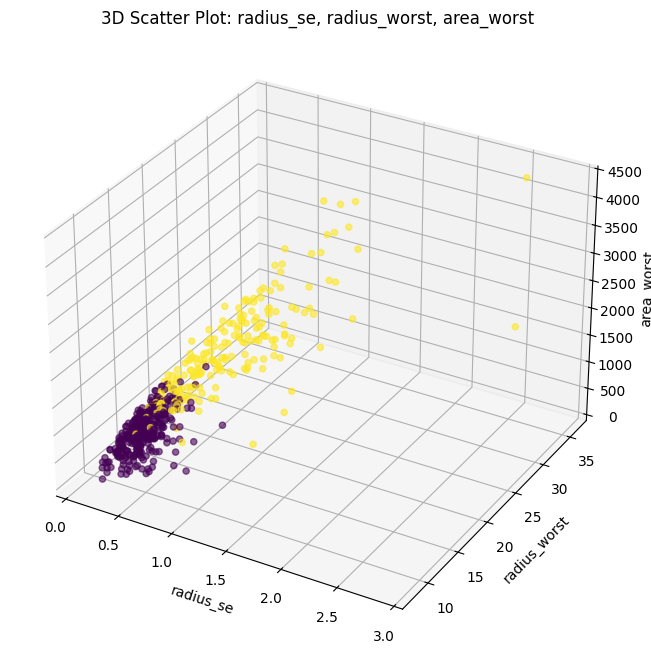

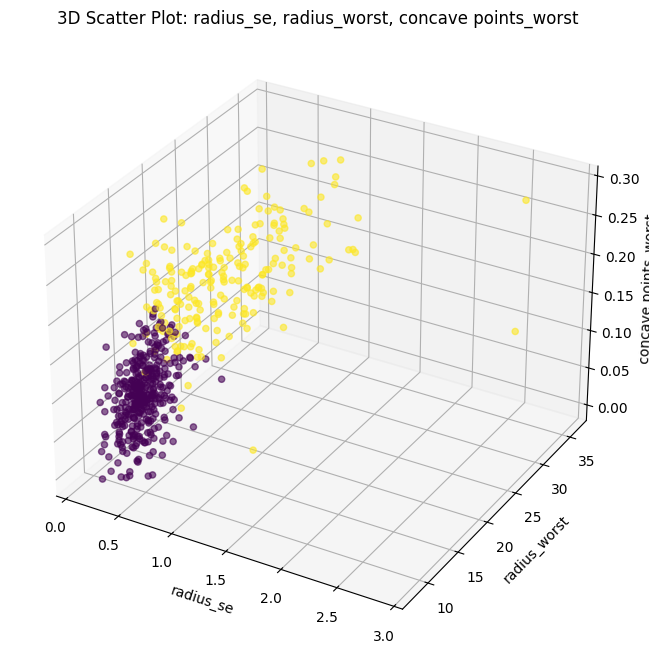

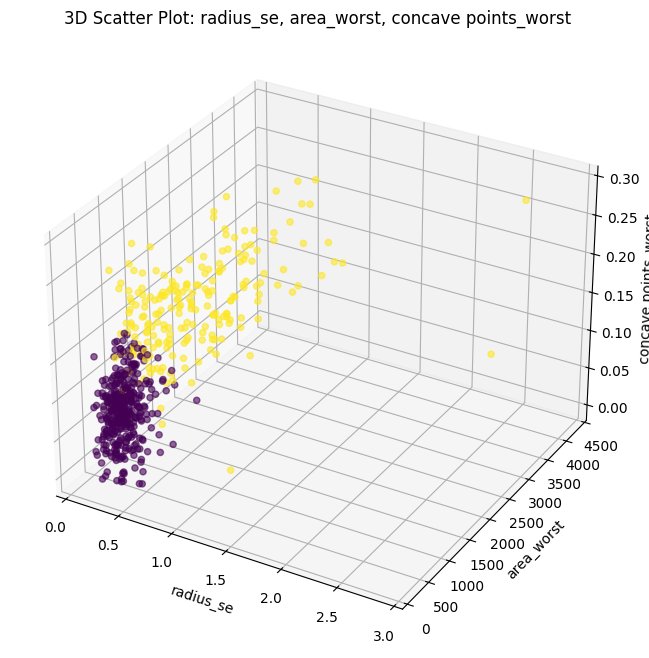

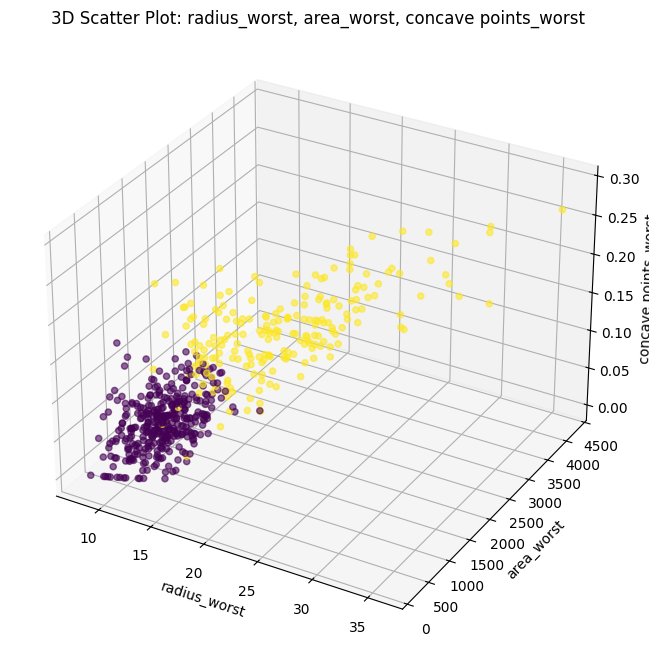

In [18]:
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

# Generate all combinations of 3 features from Top4_features
feature_combinations = list(combinations(Top4_features, 3))

# Plot each combination
for feature_x, feature_y, feature_z in feature_combinations:
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot with color based on y_data
    ax.scatter(X_data_new[feature_x], X_data_new[feature_y], X_data_new[feature_z], 
               c=y_data, cmap='viridis', alpha=0.6)

    # Set labels
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_zlabel(feature_z)
    ax.set_title(f'3D Scatter Plot: {feature_x}, {feature_y}, {feature_z}')

    plt.show()


In [20]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_new, y_data, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
import qiskit 
qiskit.__version__

'1.3.3'

In [30]:
import pennylane as qml
pennylane.__version__

'0.41.0'

In [31]:
#same encoding : using angle embedding
from pennylane.templates import AngleEmbedding
num_qubits = X_train_scaled.shape[1]

# Define the quantum device
dev = qml.device("default.qubit", wires=num_qubits)

# Define the quantum circuit
@qml.qnode(dev)
def feature_map(x):
    # Embed the data into the circuit
    qml.AngleEmbedding(x, wires=range(num_qubits), rotation='Y')
    # Return the full probability vector
    return qml.probs(wires=range(num_qubits))

In [34]:
from pennylane.kernels import kernel_matrix
def quantum_kernel(X1, X2):
    # kernel_matrix will call our feature_map QNode under the hood
    return kernel_matrix(
        X1, X2,
        kernel=lambda x, y: np.dot(feature_map(x), feature_map(y))
    )

In [35]:
X_train_pl = np.array(X_train_scaled)
X_test_pl  = np.array(X_test_scaled)

# 5. Compute the kernel matrices
K_train = quantum_kernel(X_train_pl, X_train_pl)
K_test  = quantum_kernel(X_test_pl,  X_train_pl)

In [36]:
#train the svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svm = SVC(kernel='precomputed')
svm.fit(K_train, y_train)

# Evaluate the SVM
train_accuracy = svm.score(K_train, y_train)
test_accuracy = svm.score(K_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.7560
Test Accuracy: 0.7544


change the encoding + kernel

In [27]:
#using amplitude embedding
import pennylane as qml
# from pennylane.templates import amplitude_embedding
num_qubits = int(np.log2(X_train_scaled.shape[1]) )

# Define the quantum device
dev = qml.device("default.qubit", wires=num_qubits)

# Define the quantum circuit
@qml.qnode(dev)
def feature_map(x):
    # Embed the data into the circuit
    qml.AmplitudeEmbedding(x, wires=range(num_qubits), normalize=True)
    # Return the full probability vector
    return qml.probs(wires=range(num_qubits))

In [28]:
from pennylane.kernels import kernel_matrix

def quantum_kernel_quadratic(X1, X2):
    # kernel_matrix will call our feature_map QNode under the hood
    return kernel_matrix(
        X1, X2,
        kernel=lambda x, y: np.abs(np.dot(feature_map(x), feature_map(y))) ** 2  
    )

In [29]:
X_train_pl = np.array(X_train_scaled)
X_test_pl  = np.array(X_test_scaled)

# 5. Compute the kernel matrices
K_train = quantum_kernel_quadratic(X_train_pl, X_train_pl)
K_test  = quantum_kernel_quadratic(X_test_pl,  X_train_pl)

In [30]:
#train the svm
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svm_quadratic = SVC(kernel='precomputed')
svm_quadratic.fit(K_train, y_train)

# Evaluate the SVM
train_accuracy_svm_quadratic = svm_quadratic.score(K_train, y_train)
test_accuracy_svm_quadratic = svm_quadratic.score(K_test, y_test)

print(f"Train Accuracy: {train_accuracy_svm_quadratic:.4f}")
print(f"Test Accuracy: {test_accuracy_svm_quadratic:.4f}")

Train Accuracy: 0.6593
Test Accuracy: 0.6404
